## **Predicting weather conditions **

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from xgboost import  XGBRegressor
from sklearn import  grid_search



E:\anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
E:\anaconda\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
df = pd.read_csv(r'C:\Users\Priti\Desktop\corpnce_data_science\kaggle proj\temps.csv')
print(df.shape)
print(df.columns)


(348, 12)
Index(['year', 'month', 'day', 'week', 'temp_2', 'temp_1', 'average', 'actual',
       'forecast_noaa', 'forecast_acc', 'forecast_under', 'friend'],
      dtype='object')


**Feature types:**

**Categorical features:** week

**Numeric features:** year, month, day, temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend

In [3]:
df.head(10)

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41
5,2016,1,6,Wed,40,44,46.1,51,43,49,48,40
6,2016,1,7,Thurs,44,51,46.2,45,45,49,46,38
7,2016,1,8,Fri,51,45,46.3,48,43,47,46,34
8,2016,1,9,Sat,45,48,46.4,50,46,50,45,47
9,2016,1,10,Sun,48,50,46.5,52,45,48,48,49


In [4]:
df.info()
#no null values found in our dataset, and one categorical feature is observed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
year              348 non-null int64
month             348 non-null int64
day               348 non-null int64
week              348 non-null object
temp_2            348 non-null int64
temp_1            348 non-null int64
average           348 non-null float64
actual            348 non-null int64
forecast_noaa     348 non-null int64
forecast_acc      348 non-null int64
forecast_under    348 non-null int64
friend            348 non-null int64
dtypes: float64(1), int64(10), object(1)
memory usage: 32.7+ KB


In [5]:
df.describe()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


In [6]:
#create a new copy of df for temporary work around
df_new = df.copy()

#drop year as it is same value for entire column
df_new.drop(['year'],axis=1,inplace=True)

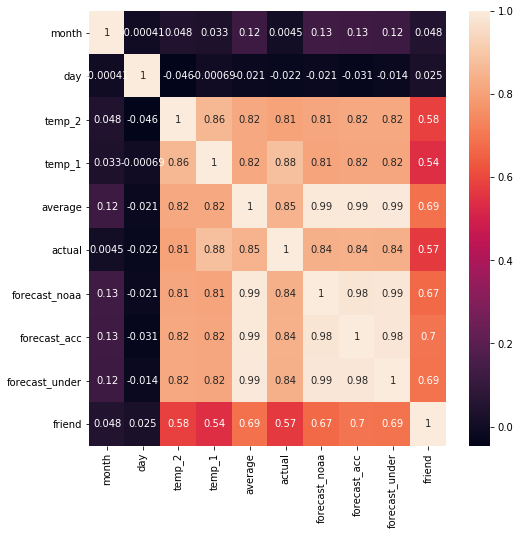

In [7]:
#Correlation map
plt.figure(figsize=(8,8))
sns.heatmap(df_new.corr(),annot=True)

From heatmap we could see month and day column has least correlations, all other features has impact on weather

**Let's visualize correlation between label and each feature**

Text(0,0.5,'actual')

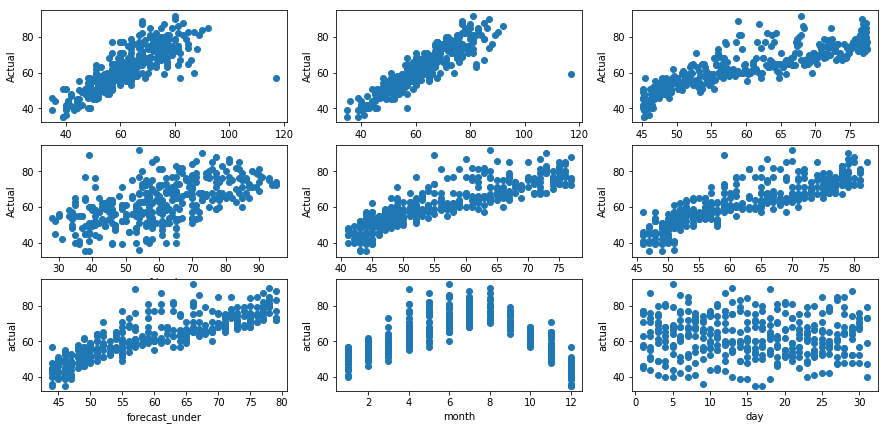

In [8]:
fig,ax = plt.subplots(3,3, figsize=(15,7))
plt.subplot(3,3,1)
plt.scatter('temp_2','actual',data=df)
plt.xlabel('temp_2')
plt.ylabel('Actual')

plt.subplot(3,3,2)
plt.scatter('temp_1','actual',data=df)
plt.xlabel('temp_1')
plt.ylabel('Actual')

plt.subplot(3,3,3)
plt.scatter('average','actual',data=df)
plt.xlabel('average')
plt.ylabel('Actual')

plt.subplot(3,3,4)
plt.scatter('friend','actual',data=df)
plt.xlabel('friend')
plt.ylabel('Actual')

plt.subplot(3,3,5)
plt.scatter('forecast_noaa','actual',data=df)
plt.xlabel('forecast_noaa')
plt.ylabel('Actual')

plt.subplot(3,3,6)
plt.scatter('forecast_acc','actual',data=df)
plt.xlabel('forecast_acc')
plt.ylabel('Actual')


plt.subplot(3,3,7)
plt.scatter('forecast_under','actual',data=df)
plt.xlabel('forecast_under')
plt.ylabel('actual')

plt.subplot(3,3,8)
plt.scatter('month','actual',data=df)
plt.xlabel('month')
plt.ylabel('actual')

plt.subplot(3,3,9)
plt.scatter('day','actual',data=df)
plt.xlabel('day')
plt.ylabel('actual')


From above plots we can see that except day and month there is a linear relationship between feature and label.

Drop day, year and week columns as they are not usefull for predictions

In [9]:
df.drop(['day','year','week'],axis=1,inplace=True)

Create dummies for months as it is nominal in nature

In [10]:
month_dum = pd.get_dummies(df['month'],drop_first=True)
df= pd.concat([df,month_dum],axis=1)
df.drop(['month'],axis=1,inplace=True)


In [11]:
print(df.shape)
df.head()


(348, 19)


,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,2,3,4,5,6,7,8,9,10,11,12
0,45,45,45.6,45,43,50,44,29,0,0,0,0,0,0,0,0,0,0,0
1,44,45,45.7,44,41,50,44,61,0,0,0,0,0,0,0,0,0,0,0
2,45,44,45.8,41,43,46,47,56,0,0,0,0,0,0,0,0,0,0,0
3,44,41,45.9,40,44,48,46,53,0,0,0,0,0,0,0,0,0,0,0
4,41,40,46.0,44,46,46,46,41,0,0,0,0,0,0,0,0,0,0,0


In [12]:
#separate features and label

y = df['actual']
df.drop(['actual'],inplace=True,axis=1)

In [13]:
#features
X=df


In [14]:
#split for train and test

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=42)
print(X_train.shape)
print(X_test.shape)

(278, 18)
(70, 18)


**Creating model**

**Fitting and predicting using KNN regressor**

In [15]:
knn =KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [16]:
pred_knn = knn.predict(X_test)
pred_knn

array([64.33333333, 63.        , 51.66666667, 65.66666667, 67.66666667,
       73.        , 84.        , 76.66666667, 64.        , 74.33333333,
       65.33333333, 76.        , 42.        , 65.33333333, 71.        ,
       53.33333333, 64.66666667, 57.        , 56.33333333, 78.        ,
       60.33333333, 51.66666667, 68.        , 60.66666667, 57.66666667,
       53.        , 74.        , 48.        , 65.33333333, 78.66666667,
       62.        , 62.        , 50.33333333, 75.66666667, 76.33333333,
       58.        , 53.66666667, 51.33333333, 70.        , 43.33333333,
       70.33333333, 58.33333333, 74.        , 40.66666667, 60.        ,
       71.        , 55.66666667, 80.33333333, 54.66666667, 40.66666667,
       47.33333333, 40.66666667, 66.33333333, 66.33333333, 72.33333333,
       59.66666667, 55.33333333, 69.33333333, 53.33333333, 61.66666667,
       66.33333333, 50.        , 57.66666667, 72.        , 65.        ,
       58.66666667, 77.        , 70.33333333, 76.66666667, 43.  

In [17]:
print('Explained variance for knn is:', metrics.explained_variance_score(pred_knn,y_test))
print('\n RMSE for knn is:',np.sqrt(metrics.mean_squared_error(pred_knn,y_test)))

Explained variance for knn is: 0.7763195556575364

 RMSE for knn is: 5.159365040297848


**Predictions using linear regression**

In [18]:
lin = LinearRegression()
lin.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
print(lin.coef_)
print(lin.intercept_)

[-3.09332362e-02  4.41484385e-01  1.04852800e+00 -3.80177063e-02
  1.37366362e-02 -2.70286303e-01 -4.62733894e-03  6.91739388e-01
 -2.04557194e-01  1.81607702e+00 -2.70455097e+00 -4.28355967e+00
 -6.12242305e+00 -5.92164868e+00 -4.86342340e+00 -3.87273159e+00
  1.07484608e+00 -3.04943663e+00]
-6.135371966893942


In [20]:
pred_lin = lin.predict(X_test)
pred_lin

array([66.13240925, 66.19164855, 50.2835195 , 60.7838293 , 69.2125238 ,
       70.26987388, 78.9409748 , 79.7198992 , 56.67095141, 74.60620789,
       60.38482717, 75.52954506, 40.36100701, 67.01017316, 70.675677  ,
       55.4363868 , 60.97727842, 56.88552337, 55.96829304, 78.60336745,
       64.83361066, 55.53745036, 66.1329493 , 59.88067005, 58.68545865,
       52.02977213, 67.63478932, 48.95868368, 64.87478097, 75.9608767 ,
       70.14650367, 68.07828924, 53.02682554, 79.50799194, 75.5051979 ,
       57.02483382, 54.83772906, 49.91184033, 72.36663834, 43.71820958,
       65.93100319, 56.15280052, 73.76347693, 46.26925016, 58.71943101,
       69.81987616, 55.04479587, 78.92442961, 56.58888207, 42.29537539,
       45.59699568, 45.04002131, 64.15474557, 68.09602325, 75.19809655,
       57.8660148 , 56.08729351, 58.23618453, 54.56433358, 65.067042  ,
       68.32488997, 52.07099809, 57.37867971, 68.98592811, 59.31013   ,
       61.63876553, 74.17087956, 71.1903203 , 74.76675732, 42.83

In [21]:
print('Explained variance for linear regression is:', metrics.explained_variance_score(pred_lin,y_test))
print('\n RMSE for linear regression is:',np.sqrt(metrics.mean_squared_error(pred_lin,y_test)))

Explained variance for linear regression is: 0.7603141530711299

 RMSE for linear regression is: 5.111342538811784


**Using XGboost regressor to predict**

In [22]:
xg  =XGBRegressor()
xg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [23]:
pred_xg = xg.predict(X_test)
pred_xg

array([69.97263 , 64.005066, 50.59981 , 62.15732 , 64.39209 , 73.86294 ,
       80.14526 , 73.11985 , 60.678177, 75.47928 , 64.84834 , 71.01323 ,
       37.76027 , 64.39259 , 72.01097 , 55.55963 , 63.300255, 55.971615,
       57.075733, 77.505295, 63.647663, 55.392876, 65.47006 , 62.15732 ,
       59.490208, 51.26402 , 66.44801 , 46.914276, 61.964706, 81.38748 ,
       71.27769 , 65.74294 , 52.68061 , 82.53359 , 74.52682 , 60.858738,
       54.895603, 52.26647 , 69.30795 , 43.704018, 71.33109 , 55.994034,
       78.16737 , 41.544106, 61.639183, 74.94802 , 53.238434, 82.55273 ,
       53.596474, 41.427063, 46.347332, 42.267445, 62.93343 , 64.58027 ,
       74.629425, 62.08207 , 55.74541 , 57.987827, 55.4238  , 61.57944 ,
       63.87909 , 50.396996, 61.891663, 69.610306, 60.71964 , 60.78407 ,
       73.69399 , 69.43472 , 77.007126, 42.144733], dtype=float32)

In [24]:
print('Explained variance for XGVoost Regressor is:', metrics.explained_variance_score(pred_xg,y_test))
print('\n RMSE for XGBoost Regressor is:',np.sqrt(metrics.mean_squared_error(pred_xg,y_test)))

Explained variance for XGVoost Regressor is: 0.7815558738607948

 RMSE for XGBoost Regressor is: 5.12106945387122


**Fittinga and predicting using Random Forest model**

In [25]:
rf = RandomForestRegressor(random_state=5, n_estimators=20)
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
           oob_score=False, random_state=5, verbose=0, warm_start=False)

In [26]:
pred_rf = rf.predict(X_test)
pred_rf

array([68.35, 65.1 , 49.9 , 63.  , 67.2 , 73.85, 78.5 , 74.15, 62.75,
       77.8 , 65.2 , 73.4 , 38.2 , 63.05, 70.3 , 56.7 , 62.15, 57.7 ,
       56.6 , 75.7 , 61.4 , 53.45, 66.95, 60.1 , 60.1 , 53.4 , 65.6 ,
       45.85, 63.  , 79.25, 71.1 , 65.45, 54.45, 83.35, 74.8 , 60.55,
       53.45, 51.7 , 68.75, 42.  , 75.2 , 56.95, 79.65, 43.05, 59.9 ,
       76.9 , 53.2 , 80.8 , 53.55, 41.95, 45.4 , 41.45, 64.  , 66.55,
       75.8 , 61.1 , 54.6 , 60.8 , 54.35, 60.6 , 67.  , 49.55, 60.25,
       69.55, 63.9 , 60.8 , 75.  , 70.05, 77.3 , 41.85])

In [27]:
print('Explained variance for Random forest is:', metrics.explained_variance_score(pred_rf,y_test))
print('\n RMSE for Random forest is:',np.sqrt(metrics.mean_squared_error(pred_rf,y_test)))

Explained variance for Random forest is: 0.8122688242125523

 RMSE for Random forest is: 4.807869293445606


**Conclusion: Random Forest worked better than xgboost, linear regression and KNN regressor**

**Result: Model : Random forest**

**RMSE : 4.8**

**Explained variance: 0.812**